# This script contains the following:
- Importing your libraries and data
- Subsetting, wrangling, and cleaning time-series data
- Time series analysis: decomposition
- Testing for stationarity
- Stationarizing the Federal Reserve Economic Data

In [1]:
# Import libraries 

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
path  = r'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [3]:
path

'/Users/lupeguevara/Documents/DOE Demographic Snapshot'

In [4]:
# Importing dataset

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'hardship_enrollment.pkl'))

In [5]:
df.head()

,District Borough Number,School Name,Year,Total Enrollment,Grade PK,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
1,01M015,P.S. 015 Roberto Clemente,2014-15,183,18,27,47,31,19,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2015-16,176,14,32,33,39,23,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2016-17,178,17,28,33,27,31,24,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2017-18,190,17,28,32,33,23,31,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
6,01M019,P.S. 019 Asher Levy,2014-15,270,30,44,40,39,35,40,...,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"


In [6]:
# Parse strings to datetime type

df['Year'] = pd.to_datetime(df['Year'], format='%Y-%y', errors='coerce')
indexedDataset = df.set_index(['Year'])

In [7]:
df.head()

,District Borough Number,School Name,Year,Total Enrollment,Grade PK,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
1,01M015,P.S. 015 Roberto Clemente,2015-01-01,183,18,27,47,31,19,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2016-01-01,176,14,32,33,39,23,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2017-01-01,178,17,28,33,27,31,24,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2018-01-01,190,17,28,32,33,23,31,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
6,01M019,P.S. 019 Asher Levy,2015-01-01,270,30,44,40,39,35,40,...,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7141 entries, 1 to 8864
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   District Borough Number       7141 non-null   object        
 1   School Name                   7141 non-null   object        
 2   Year                          7141 non-null   datetime64[ns]
 3   Total Enrollment              7141 non-null   int64         
 4   Grade PK                      7141 non-null   int64         
 5   Grade K                       7141 non-null   int64         
 6   Grade 1                       7141 non-null   int64         
 7   Grade 2                       7141 non-null   int64         
 8   Grade 3                       7141 non-null   int64         
 9   Grade 4                       7141 non-null   int64         
 10  Grade 5                       7141 non-null   int64         
 11  Grade 6                       7141 

In [9]:
df.shape

(7141, 39)

In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
df.columns

Index(['District Borough Number', 'School Name', 'Year', 'Total Enrollment',
       'Grade PK', 'Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4',
       'Grade 5', 'Grade 6', 'Grade 7', 'Grade 8', 'Grade 9', 'Grade 10',
       'Grade 11', 'Grade 12', '% Female', '% Male', '% Asian', '% Black',
       '% Hispanic', '% Multiple Race', '% White',
       '% Students with Disabilities', '% English Language Learners',
       '% Poverty', '% Economic Need Index', 'Location', 'Grades', 'Address',
       'State', 'X_COORDINATE', 'Y_COORDINATE', 'LONGITUDE', 'LATITUDE',
       'Neighborhood', 'Coordinates'],
      dtype='object')

In [12]:
df.head()

,District Borough Number,School Name,Year,Total Enrollment,Grade PK,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,...,Location,Grades,Address,State,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Neighborhood,Coordinates
1,01M015,P.S. 015 Roberto Clemente,2015-01-01,183,18,27,47,31,19,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
2,01M015,P.S. 015 Roberto Clemente,2016-01-01,176,14,32,33,39,23,17,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
3,01M015,P.S. 015 Roberto Clemente,2017-01-01,178,17,28,33,27,31,24,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
4,01M015,P.S. 015 Roberto Clemente,2018-01-01,190,17,28,32,33,23,31,...,Elementary,"PK,0K,01,02,03,04,05",333 EAST 4 STREET,NY,990141.0,202349.0,-73.978747,40.722075,Lower East Side,"(40.722075, -73.978747)"
6,01M019,P.S. 019 Asher Levy,2015-01-01,270,30,44,40,39,35,40,...,Elementary,"PK,0K,01,02,03,04,05",185 1 AVENUE,NY,988547.0,205239.0,-73.984496,40.730009,East Village,"(40.730009, -73.984496)"


# Subsetting, and Wrangling Time Series Data

In [13]:
df['Year'].value_counts()

Year
2018-01-01    1817
2017-01-01    1793
2016-01-01    1777
2015-01-01    1754
Name: count, dtype: int64

In [14]:
# Count of year
year_count = df.groupby(df['Year'].dt.date)['Year'].count()

In [15]:
print(year_count)

Year
2015-01-01    1754
2016-01-01    1777
2017-01-01    1793
2018-01-01    1817
Name: Year, dtype: int64


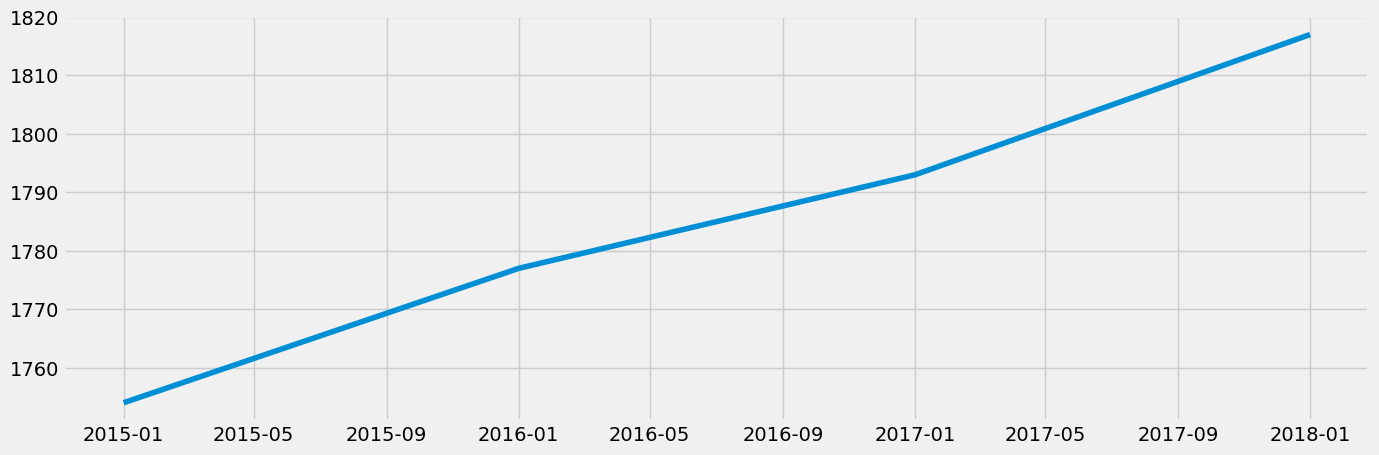

In [16]:
# Plot the 'year_count'

plt.figure(figsize=(15,5), dpi=100)
plt.plot(year_count)

In [17]:
# Average yearly enrollment
avg_enrollment = df.groupby('Year')['Total Enrollment'].mean()

In [18]:
avg_enrollment

Year
2015-01-01    595.594641
2016-01-01    594.120428
2017-01-01    595.369214
2018-01-01    587.954320
Name: Total Enrollment, dtype: float64

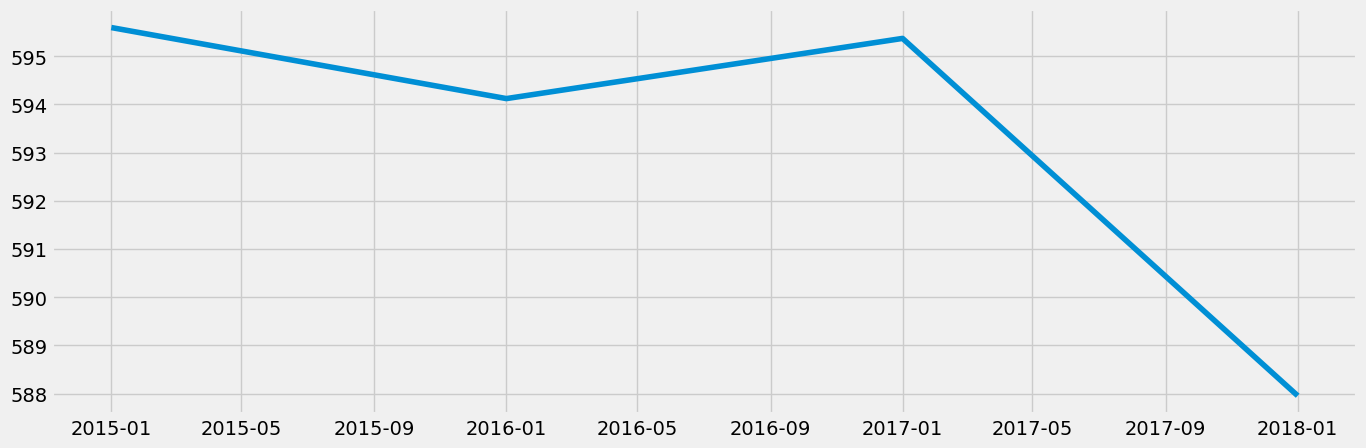

In [19]:
# Plot the 'avg_enrollment'

plt.figure(figsize=(15,5), dpi=100)
plt.plot(avg_enrollment)

In [20]:
# Create a subset
dataset = pd.DataFrame({'Date': year_count.index, 'Year Count': year_count.values, 'Average Enrollment': avg_enrollment.values})

### Selecting the data points for the analysis, we followed the logic of focusing on the 'Year Count and 'Avg Total Enrollment' columns, which are essential for our time series analysis. I made sure to exclude any irrelevant historical events or forecasted data that could bias our analysis. 

In [21]:
dataset

,Date,Year Count,Average Enrollment
0,2015-01-01,1754,595.594641
1,2016-01-01,1777,594.120428
2,2017-01-01,1793,595.369214
3,2018-01-01,1817,587.954320


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4 non-null      object 
 1   Year Count          4 non-null      int64  
 2   Average Enrollment  4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 228.0+ bytes


In [23]:
# Set the "Date" column as the index

from datetime import datetime

dataset['Datetime'] = pd.to_datetime(dataset['Date']) # Create a datetime column from "Date
dataset = dataset.set_index('Datetime') # Set the datetime as the index of the dataframe
dataset.drop(['Date'], axis=1, inplace=True) # Drop the column
dataset.head()

,Year Count,Average Enrollment
Datetime,,
2015-01-01,1754,595.594641
2016-01-01,1777,594.120428
2017-01-01,1793,595.369214
2018-01-01,1817,587.954320


In [24]:
dataset.tail()

,Year Count,Average Enrollment
Datetime,,
2015-01-01,1754,595.594641
2016-01-01,1777,594.120428
2017-01-01,1793,595.369214
2018-01-01,1817,587.954320


In [25]:
dataset.columns

Index(['Year Count', 'Average Enrollment'], dtype='object')

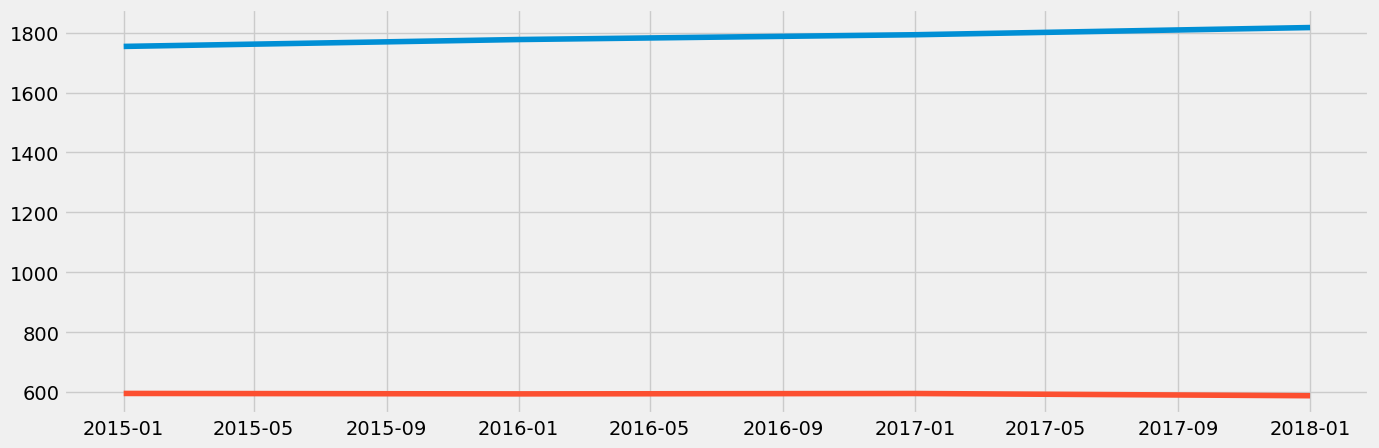

In [26]:
# Plot the dataset

plt.figure(figsize=(15,5), dpi=100)
plt.plot(dataset)

In [27]:
dataset_2 = dataset[['Average Enrollment']]

In [28]:
dataset_2

,Average Enrollment
Datetime,
2015-01-01,595.594641
2016-01-01,594.120428
2017-01-01,595.369214
2018-01-01,587.954320


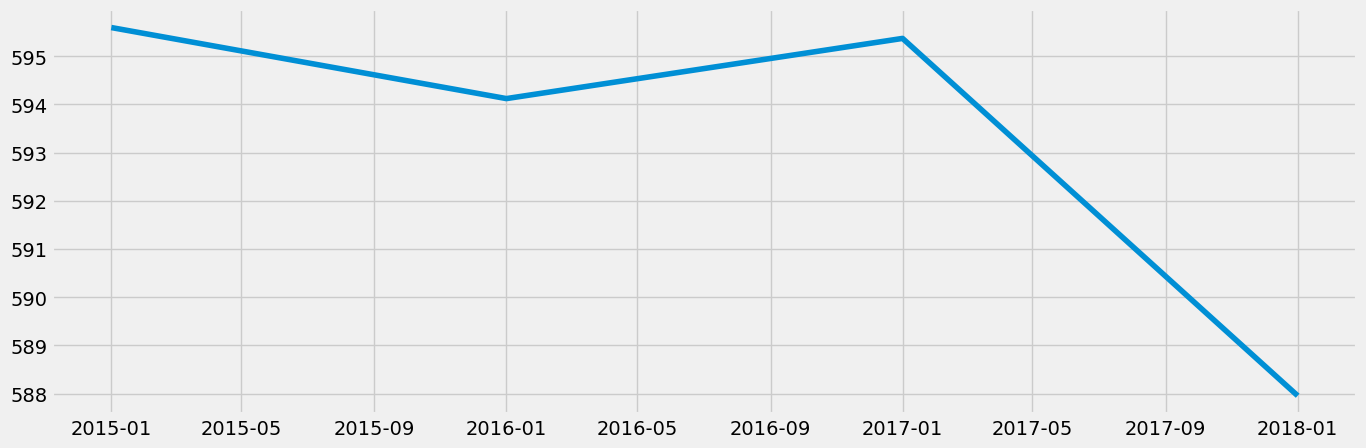

In [29]:
# Plot the dataset_2

plt.figure(figsize=(15,5), dpi=100)
plt.plot(dataset_2)

# Time-series analysis: decomposition

In [30]:
dataset

,Year Count,Average Enrollment
Datetime,,
2015-01-01,1754,595.594641
2016-01-01,1777,594.120428
2017-01-01,1793,595.369214
2018-01-01,1817,587.954320


In [31]:
column_to_drop = 'Year Count'
dataset = dataset.drop(column_to_drop, axis=1)

In [32]:
dataset

,Average Enrollment
Datetime,
2015-01-01,595.594641
2016-01-01,594.120428
2017-01-01,595.369214
2018-01-01,587.954320


In [33]:
# Reset index so that you can use the "Datetime" column as a filter

result_1 = dataset.reset_index()

In [34]:
result_1

,Datetime,Average Enrollment
0,2015-01-01,595.594641
1,2016-01-01,594.120428
2,2017-01-01,595.369214
3,2018-01-01,587.954320


In [35]:
result_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            4 non-null      datetime64[ns]
 1   Average Enrollment  4 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 196.0 bytes


In [36]:
time_series = result_1['Average Enrollment']

In [37]:
result_1['Datetime'] = pd.to_datetime(result_1['Datetime'])

In [38]:
result_1.set_index('Datetime', inplace=True)

In [39]:
time_series = result_1['Average Enrollment']

In [40]:
result_1

,Average Enrollment
Datetime,
2015-01-01,595.594641
2016-01-01,594.120428
2017-01-01,595.369214
2018-01-01,587.954320


In [41]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(time_series, model='additive')

In [42]:
decomposition

In [43]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

In [44]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [45]:
residual

Datetime
2015-01-01    0.0
2016-01-01    0.0
2017-01-01    0.0
2018-01-01    0.0
Name: resid, dtype: float64

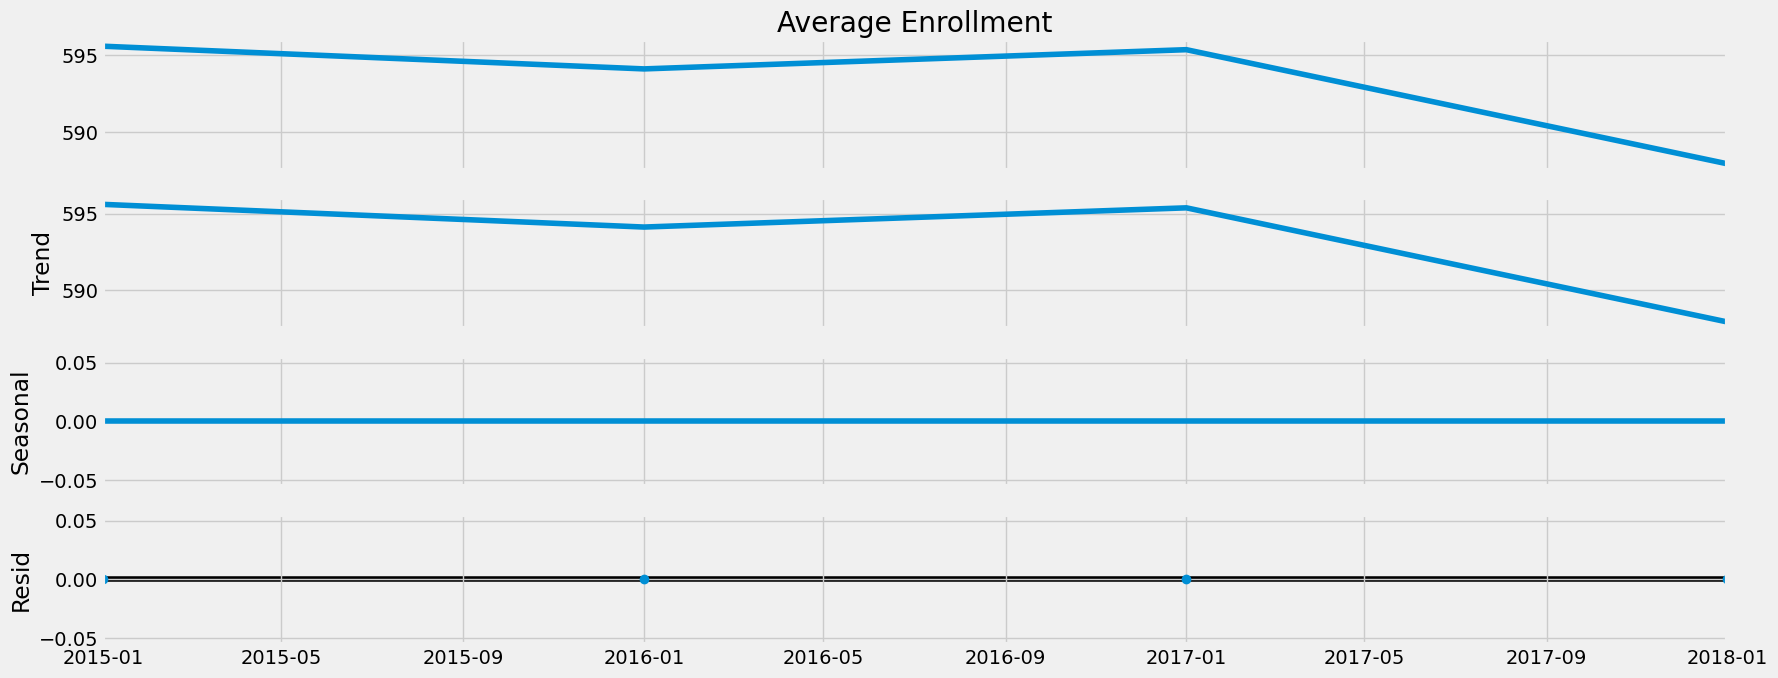

In [46]:
# Plot the separate components

decomposition.plot()
plt.show()

#### There is a downward linear trend in the Average Enrollment, which appears similar to the level as this data did not require smoothing. We can also see from the decomposition that there seems to be no seasonality present in this data, represented by the straight line. Finally, the residual chart shows the noise of the data, which seems the plots are fairly closely centered around zero, indicating isn't any amount.

# Testing for stationarity

In [47]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(result_1['Average Enrollment'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.831321
p-value                         0.809748
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


- The test statistic is -0.831321, which is greater than the critical values at all significance levels.
- The p-value is 0.809748, which is significantly higher than the typical significance levels (e.g., 0.01 or 0.05).
- Since the test statistic is not less than the critical values and the p-value is high, we fail to reject the null hypothesis.
- This indicates that the data is likely non-stationary, suggesting the presence of trends or seasonality.
- Further analysis, such as differencing or seasonal decomposition, may be necessary to achieve stationarity.

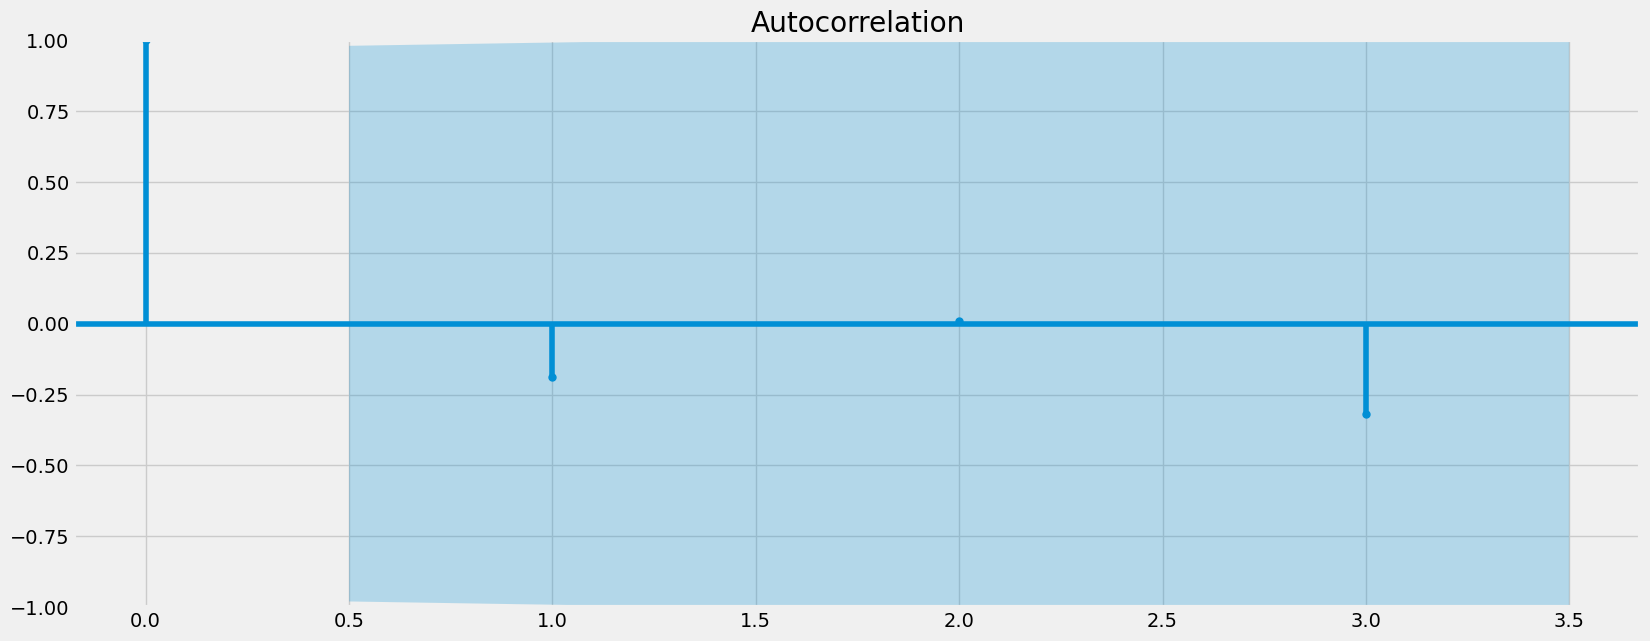

In [48]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(result_1)
plt.show()

#### There is one lag above the blue confidence interval, so I will choose to stop here. 

In [50]:
# Saving the dataframe to pkl file

dataset.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'avg_enroll_timeseries.pkl'))